In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
df = pd.read_csv('clean_google_playstore_data')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     9373 non-null   object 
 12  Android Ver     9476 non-null   object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.150653e+04,2.259602e+04,10.0,4900.0,13000.0,30000.0,1.000000e+05
Installs,10840.0,1.546434e+07,8.502936e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.0,0.0,0.0,0.0,4.000000e+02
Day,10840.0,1.560904e+01,9.561621e+00,1.0,6.0,16.0,24.0,3.100000e+01
Month,10840.0,6.422325e+00,2.578388e+00,1.0,5.0,7.0,8.0,1.200000e+01
Year,10840.0,2.017400e+03,1.100914e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


In [6]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,NaN,4.0.3,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,NaN,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,NaN,NaN,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,NaN,NaN,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,NaN,NaN,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0,1,6,2018


In [8]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,NaN,4.0.3,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,NaN,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0,25,2,2016
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0,6,7,2018
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4,24,3,2018
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4,30,7,2018


In [9]:
df = df.drop_duplicates(subset = ['App'], keep='first')

In [10]:
df.shape

(9659, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     8596 non-null   object 
 12  Android Ver     8667 non-null   object 
 13  Day             9659 non-null   int64  
 14  Month           9659 non-null   int64  
 15  Year            9659 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [12]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

In [14]:
categorical_feature  = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
numeric_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [17]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [18]:
df[categorical_feature]

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,NaN,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,NaN,NaN


In [19]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [21]:
df['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [22]:
df['Type'].value_counts(normalize = True)  # gives percentage of the data that this value holds

Free    0.921723
Paid    0.078277
Name: Type, dtype: float64

In [25]:
for col in categorical_feature:
    print(f'{col} : {df[col].value_counts(normalize=True)*100}')
    print('==============================================================')

App : Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
Category : FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.5717

<AxesSubplot:xlabel='Type', ylabel='count'>

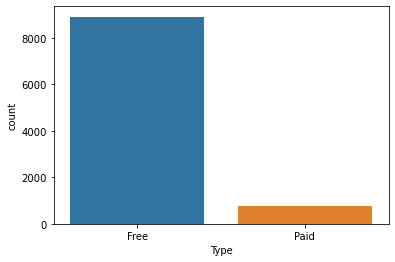

In [26]:
sns.countplot(x=df['Type'])

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

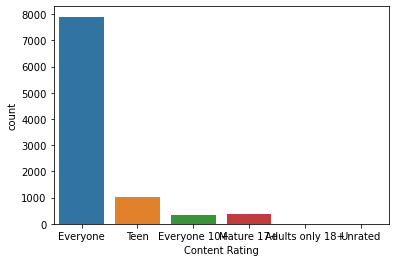

In [27]:
sns.countplot(x=df['Content Rating'])

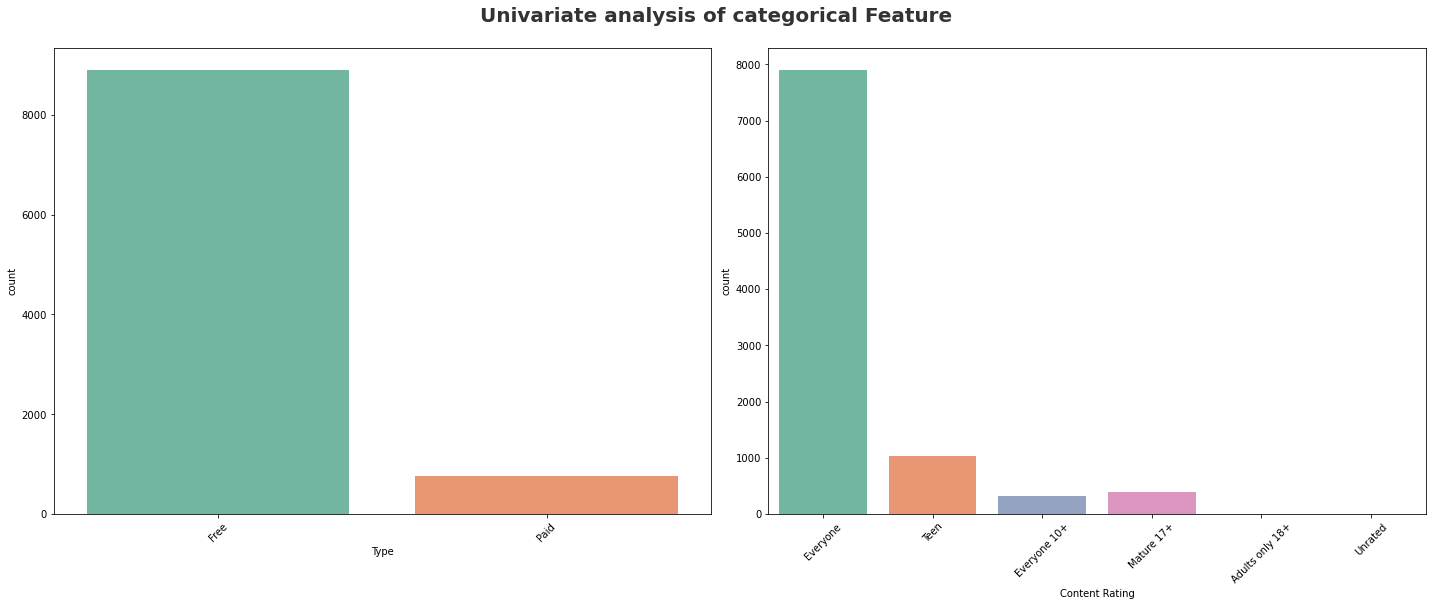

In [29]:
# categorical columns 

plt.figure(figsize = (20,15))                              
plt.suptitle('Univariate analysis of categorical Feature', fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category = ['Type','Content Rating']

for i in range(len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x= df[category[i]],palette = "Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Creating univariate analysis charts of categorical features in a dataset using the `matplotlib` and `seaborn` libraries. Let's break down what each part of the code does:

1. `plt.figure(figsize=(20, 15))`: This line creates a new figure for the plot with a specified size (20 units in width and 15 units in height). It adjusts the size of the chart to make it larger and more readable.

2. `plt.suptitle('Univariate analysis of categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)`: This sets the super title for the entire plot. It's a title that covers all the subplots. The parameters control the title's appearance, such as its size, boldness, transparency, and vertical position (y=1).

3. `category = ['Type', 'Content Rating']`: This is a list of categorical columns from the dataset that you want to analyze. The code will generate individual subplots for each of these columns.

4. `for i in range(len(category)):`: This initiates a for loop to go through each categorical column specified in the `category` list.

5. `plt.subplot(2, 2, i+1)`: This line creates a subplot within the figure. It specifies that there will be a 2x2 grid of subplots, and the `i+1` parameter indicates the position of the current subplot in the grid.

6. `sns.countplot(x=df[category[i]], palette="Set2")`: This line uses Seaborn to create a countplot for the current categorical column. It visualizes the frequency of each category in the specified column. The `palette` parameter sets the color palette for the plot.

7. `plt.xlabel(category[i])`: Sets the x-axis label of the current subplot to the name of the categorical column.

8. `plt.xticks(rotation=45)`: Rotates the x-axis labels by 45 degrees to improve readability if the category labels are long.

9. `plt.tight_layout()`: Ensures that the subplots are properly spaced and not overlapping.

The code effectively creates individual countplots for each specified categorical column in the dataset, providing a visual representation of the distribution of categories within those columns. This is useful for understanding the distribution of categorical data and identifying any patterns or insights in the data.

In [30]:
numeric_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

<AxesSubplot:xlabel='Price', ylabel='Density'>

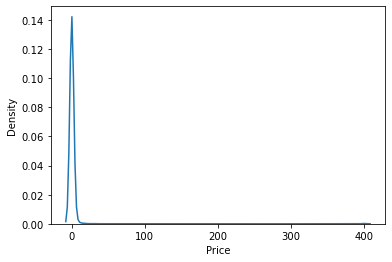

In [31]:
sns.kdeplot(df['Price'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

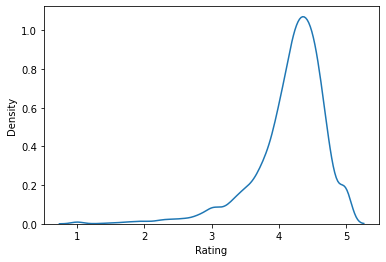

In [32]:
sns.kdeplot(df['Rating'])

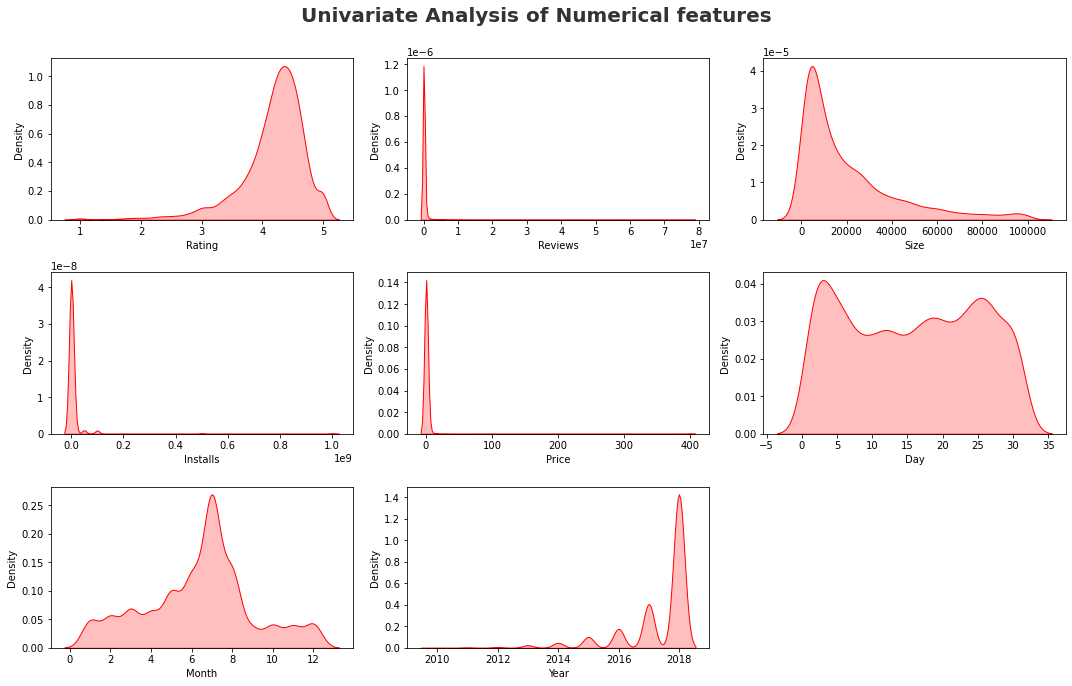

In [35]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical features', fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_feature[i]],shade=True, color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

Univariate Analysis

Most popular category in app

<AxesSubplot:ylabel='App'>

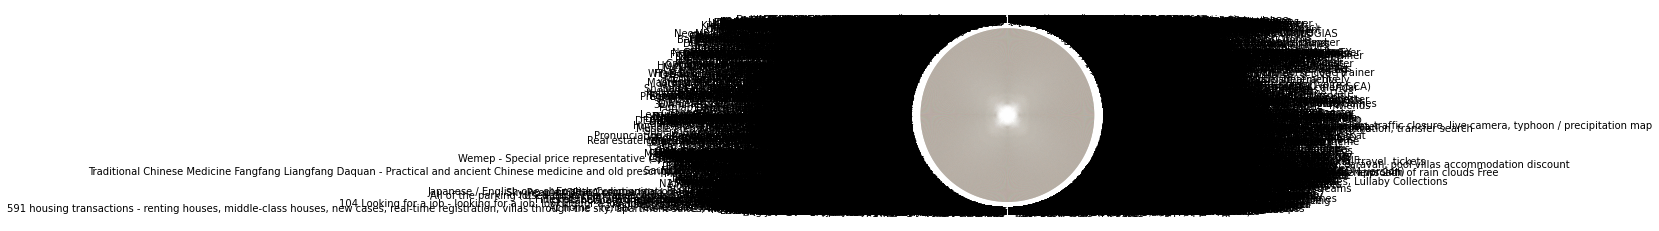

In [37]:
#df['App'].value_counts().plot.pie(y=df['App'])

# ways to make it faster

<AxesSubplot:ylabel='App'>

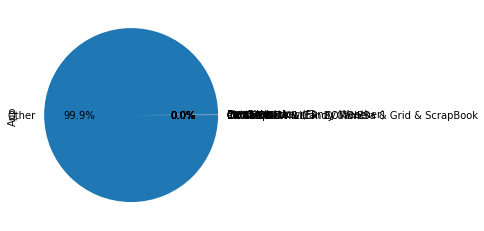

In [38]:
#Limit the Number of Values Displayed

top_n = 10  # Number of top values to display
value_counts = df['App'].value_counts()
top_values = value_counts.head(top_n)
top_values['Other'] = value_counts[top_n:].sum()  # Combine the rest as 'Other'
top_values.plot.pie(autopct='%1.1f%%')


<AxesSubplot:ylabel='App'>

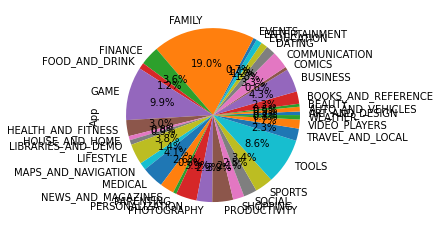

In [40]:
# Aggregate Data

# Assuming you have a 'Category' column
category_counts = df.groupby('Category')['App'].count()
category_counts.plot.pie(autopct='%1.1f%%')


<AxesSubplot:ylabel='App'>

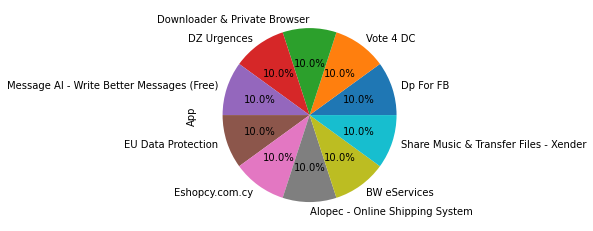

In [43]:
# Sample Data

sample_size = 10  # Number of data points to sample
sampled_data = df['App'].sample(n=sample_size)
sampled_data.value_counts().plot.pie(autopct='%1.1f%%')


<AxesSubplot:ylabel='Category'>

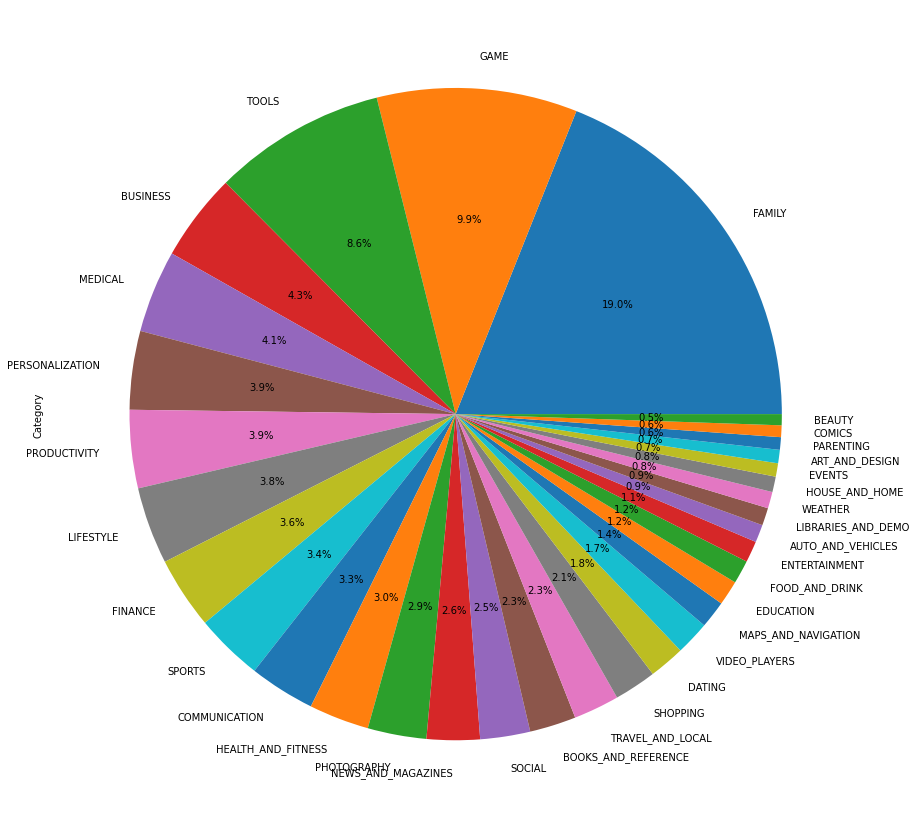

In [49]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,15),autopct='%1.1f%%')

##we can save this chart in the form of image

plt.savefig('category_pie_chart.png')

plt.close()     -- Recommended to close

In [60]:
df_cat = df['Category'].value_counts()[:10]

In [61]:
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Counts'},inplace=True)
category.head()

,Counts
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


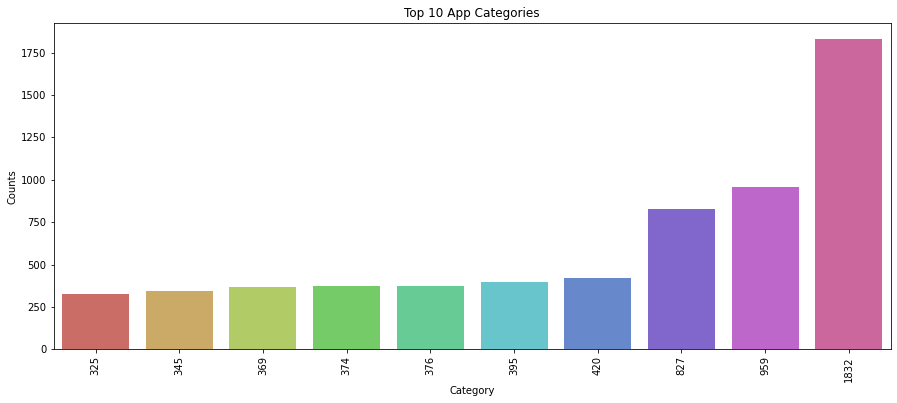

In [63]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_cat,y='Counts',data=category[:10],palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

In [65]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


## Bivariate Analysis

In [72]:
# which category having the highest number of installs

df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

# with reset_index() you can make it into a dataframe 
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


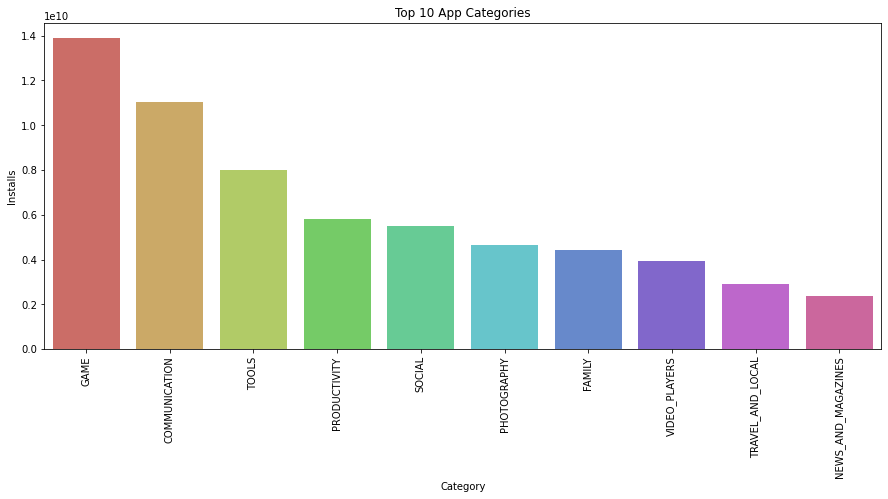

In [74]:
plt.figure(figsize=(15,6))
sns.barplot(x='Category',y='Installs',data=df_cat_installs[:10],palette='hls')  # or data = df_cat_installs.head(10)
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

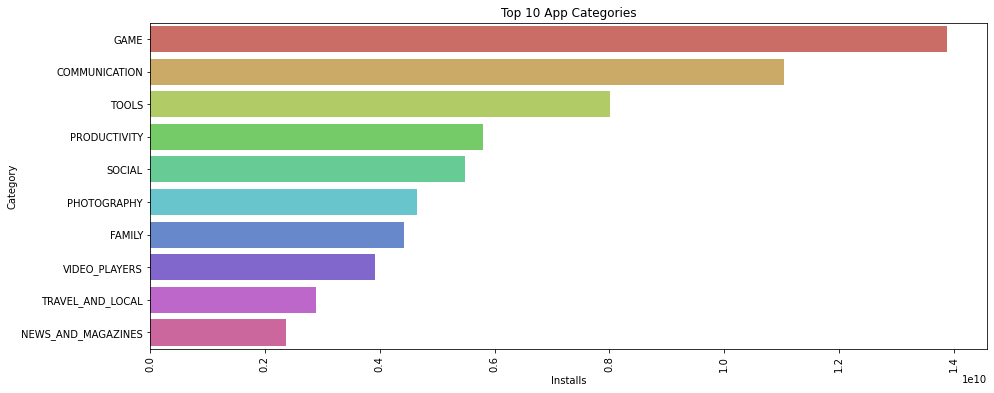

In [75]:
plt.figure(figsize=(15,6))
sns.barplot(x='Installs',y='Category',data=df_cat_installs[:10],palette='hls')  # or data = df_cat_installs.head(10)
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

In [80]:
df2 = df_cat_installs.head(10)

Text(0.5, 1.0, 'Most popular categories in playstore')

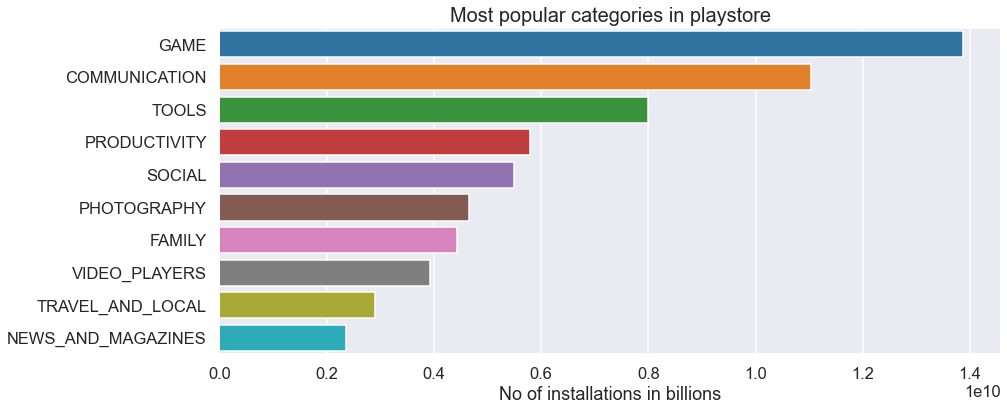

In [81]:
plt.figure(figsize=(14,6))
sns.set_context("talk")
sns.set_style('darkgrid')

ax = sns.barplot(x='Installs',y='Category',data=df2)  # df2 = df_cat_installs.head(10)
ax.set_xlabel('No of installations in billions')
ax.set_ylabel('')                                     
ax.set_title('Most popular categories in playstore',size=20)

## What is the Top 5 most installed Apps in Each popular categories ?? 

In [82]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [90]:
# multivariate data analysis including(Installs, Category, Apps)
dfa = df.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000
4,ART_AND_DESIGN,Ai illustrator viewer,100000
...,...,...,...
9654,WEATHER,Yahoo Weather,10000000
9655,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000
9656,WEATHER,Yandex.Weather,10000000
9657,WEATHER,weather - weather forecast,1000000


In [97]:
dfa = dfa.sort_values('Installs',ascending=False)
dfa

,Category,App,Installs
9311,TRAVEL_AND_LOCAL,Google Street View,1000000000
1055,COMMUNICATION,Gmail,1000000000
7080,PHOTOGRAPHY,Google Photos,1000000000
7919,SOCIAL,Instagram,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...,...
9275,TRAVEL_AND_LOCAL,EG | Explore Folegandros,0
6020,MEDICAL,EP Cook Book,0
3662,FINANCE,Eu sou Rico,0
1797,FAMILY,Ain Arabic Kids Alif Ba ta,0


In [98]:
dfa[dfa.Category == 'GAME']

,Category,App,Installs
4773,GAME,Subway Surfers,1000000000
4167,GAME,Candy Crush Saga,500000000
4802,GAME,Temple Run 2,500000000
4628,GAME,Pou,500000000
4580,GAME,My Talking Tom,500000000
...,...,...,...
4097,GAME,Bi-Tank Ads Free,1
4573,GAME,Mu.F.O.,1
4226,GAME,D+H Reaction Wall,1
4650,GAME,Ra Ga Ba,1


In [101]:
dfa['Category'].unique()

array(['TRAVEL_AND_LOCAL', 'COMMUNICATION', 'PHOTOGRAPHY', 'SOCIAL',
       'VIDEO_PLAYERS', 'TOOLS', 'BOOKS_AND_REFERENCE', 'GAME',
       'PRODUCTIVITY', 'NEWS_AND_MAGAZINES', 'ENTERTAINMENT',
       'HEALTH_AND_FITNESS', 'BUSINESS', 'FAMILY', 'MAPS_AND_NAVIGATION',
       'SHOPPING', 'LIFESTYLE', 'FINANCE', 'EDUCATION', 'PERSONALIZATION',
       'SPORTS', 'WEATHER', 'ART_AND_DESIGN', 'FOOD_AND_DRINK', 'DATING',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'PARENTING',
       'AUTO_AND_VEHICLES', 'COMICS', 'BEAUTY', 'EVENTS', 'MEDICAL'],
      dtype=object)

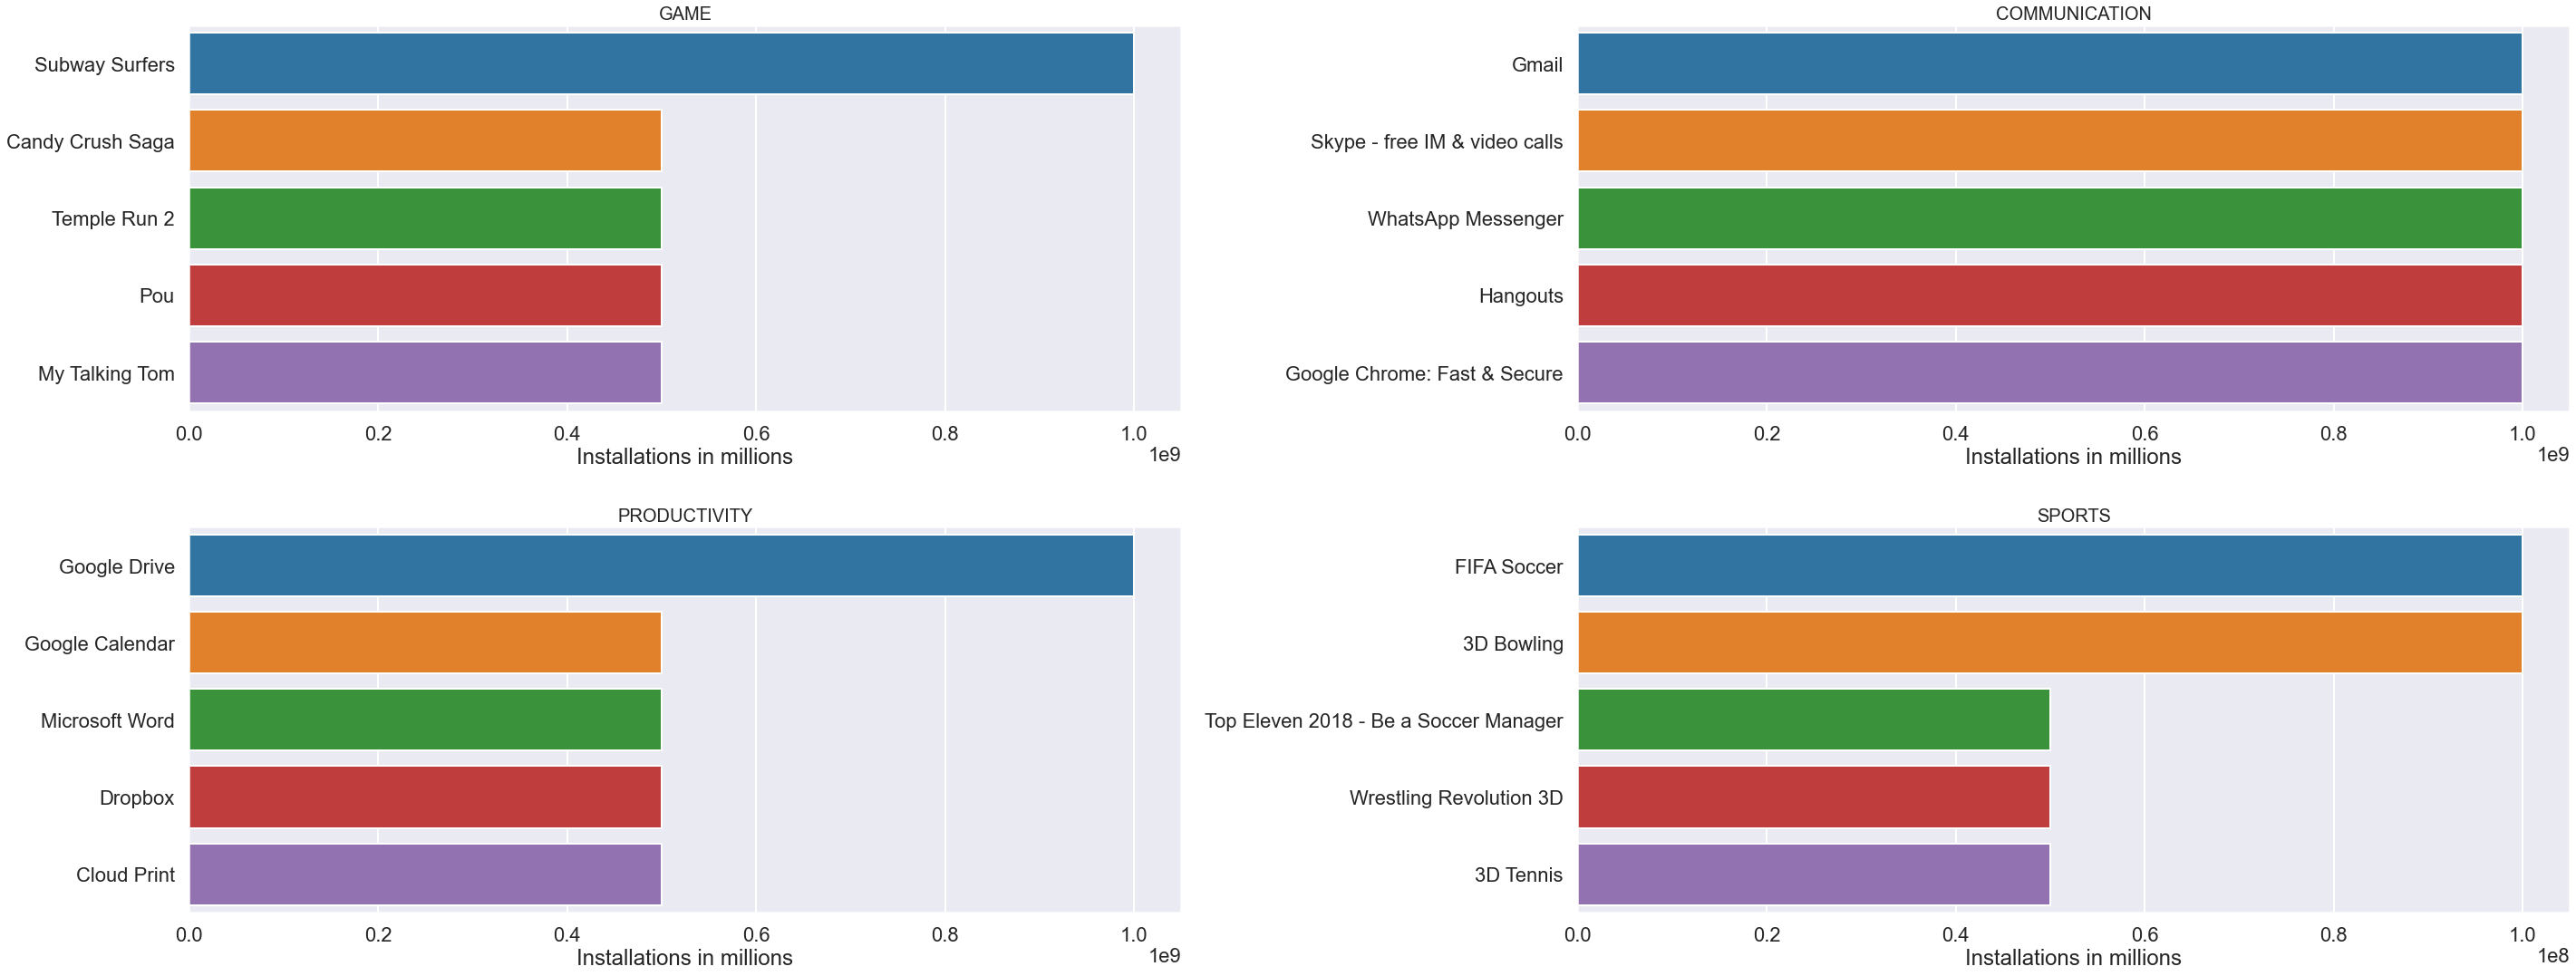

In [102]:
apps = ['GAME','COMMUNICATION','PRODUCTIVITY','SPORTS']
sns.set_context('poster')
sns.set_style('darkgrid')

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data = df3,x = 'Installs',y='App')
    plt.xlabel('Installations in millions')
    plt.ylabel('')
    plt.title(app,size=20)
    
plt.tight_layout()
plt.subplots_adjust(hspace=.3)
plt.show()
    

# How many apps in playstore which get 5 star rating

In [104]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [113]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [132]:
dfr = df.groupby(['App'])['Rating'].sum().reset_index()
rating = dfr.sort_values('Rating',ascending = False)
rating

,App,Rating
2659,Comunidad De Fe Minitries,5.0
8236,Tablet Reminder,5.0
6644,Noticias FC Barcelona,5.0
8132,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
2843,DC N COMPANY ENTERTAINMENT RADIO!,5.0
...,...,...
2922,DK Childcare Centers,0.0
6907,Pediatric Emergency Guide,0.0
6914,Pekalongan CJ,0.0
6917,Penn State Health OnDemand,0.0


In [134]:
rating[rating.Rating==5.0]

,App,Rating
2659,Comunidad De Fe Minitries,5.0
8236,Tablet Reminder,5.0
6644,Noticias FC Barcelona,5.0
8132,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
2843,DC N COMPANY ENTERTAINMENT RADIO!,5.0
...,...,...
694,American Girls Mobile Numbers,5.0
9394,daskal.eu,5.0
4652,Free coupons and vouchers,5.0
1630,Bk Usha behn,5.0


<AxesSubplot:xlabel='Price', ylabel='Category'>

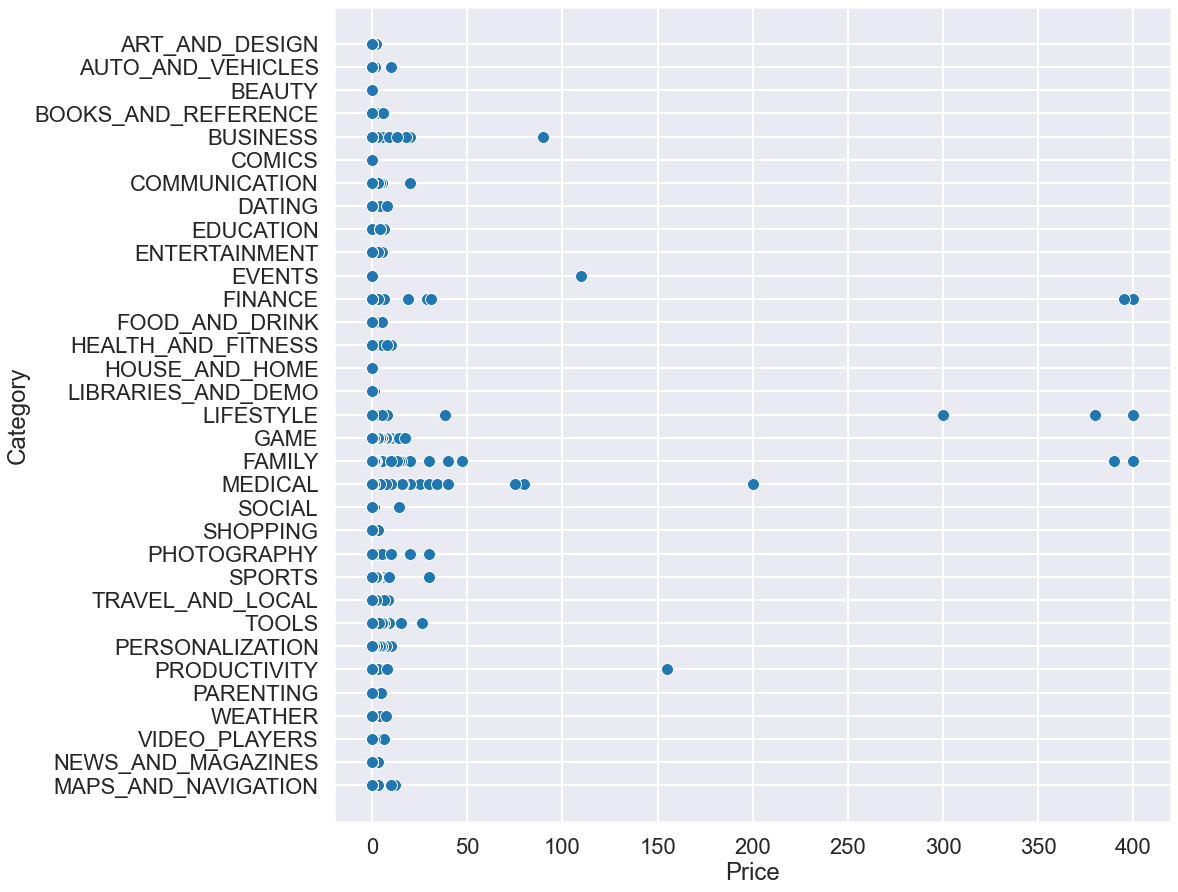

In [135]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df,x='Price',y='Category')

# Which Category apps users are reviewing the most??

In [136]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [140]:
# category, app, review
reviews = df.groupby(['App','Category'])['Reviews'].sum().sort_values(ascending=False).reset_index()
reviews

,App,Category,Reviews
0,Facebook,SOCIAL,78158306
1,WhatsApp Messenger,COMMUNICATION,69119316
2,Instagram,SOCIAL,66577313
3,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847
4,Clash of Clans,GAME,44891723
...,...,...,...
9654,Cypress College Library,BOOKS_AND_REFERENCE,0
9655,Cyborg AX-001,GAME,0
9656,Kiosque CD,TRAVEL_AND_LOCAL,0
9657,EP Cook Book,MEDICAL,0


<AxesSubplot:xlabel='Reviews', ylabel='Category'>

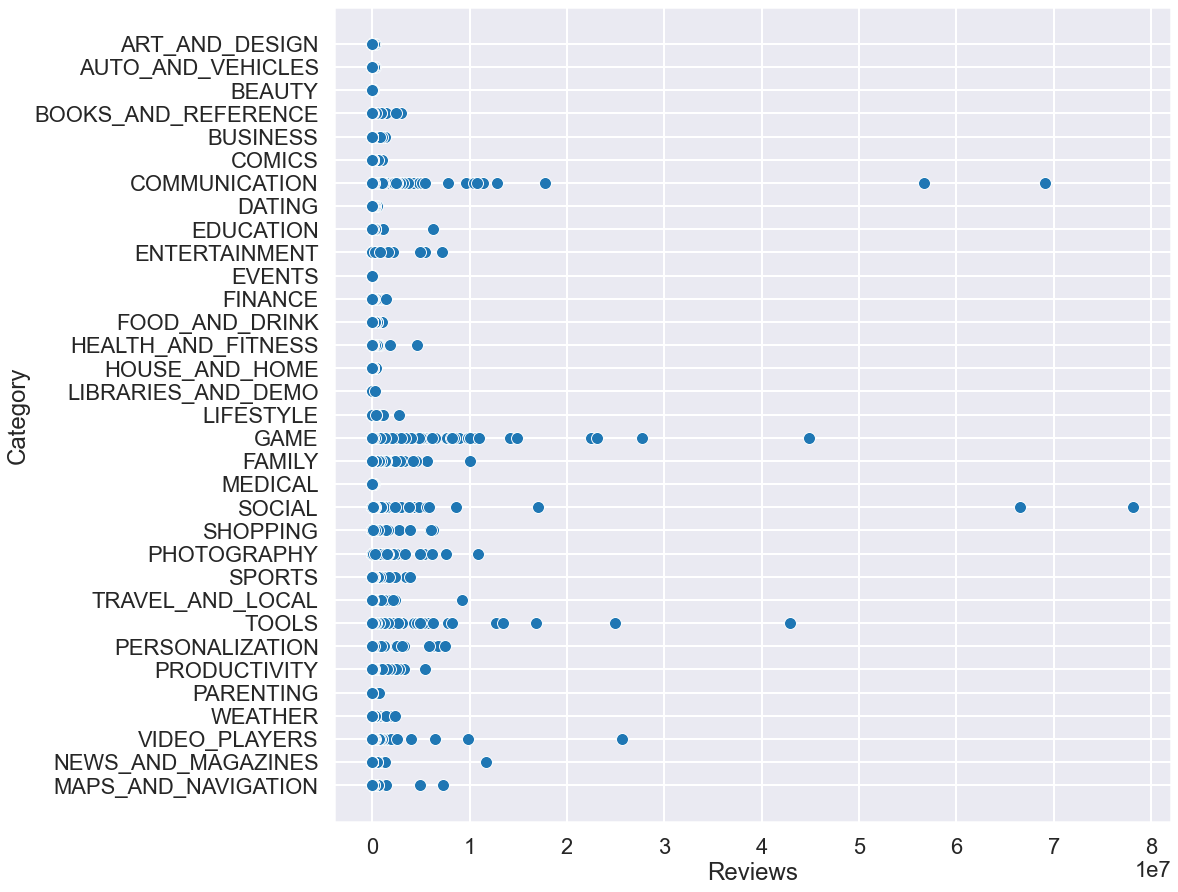

In [141]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df,x='Reviews',y='Category')

# Which Category app users are reviewing the most ??

In [151]:
df.groupby('Category').agg({'Installs':'sum','Reviews':'sum'}).sort_values('Reviews',ascending=False).head()

,Installs,Reviews
Category,,
GAME,13878924415,622298709
COMMUNICATION,11038276251,285811368
TOOLS,8001771915,229356578
SOCIAL,5487867902,227927801
FAMILY,4427941505,143825488


In [152]:
df.head(1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018


In [153]:
df.groupby(['Category','App'])["Reviews"].sum().reset_index()

,Category,App,Reviews
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,27
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,1518
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,48
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,18
4,ART_AND_DESIGN,Ai illustrator viewer,486
...,...,...,...
9654,WEATHER,Yahoo Weather,1312037
9655,WEATHER,Yahoo! Weather for SH Forecast for understandi...,7457
9656,WEATHER,Yandex.Weather,309617
9657,WEATHER,weather - weather forecast,11118


In [154]:
df.groupby("Category").agg({"Installs":"sum","Reviews":"sum"}).reset_index()


,Category,Installs,Reviews
0,ART_AND_DESIGN,114338100,1419203
1,AUTO_AND_VEHICLES,53130211,1163666
2,BEAUTY,27197050,396240
3,BOOKS_AND_REFERENCE,1665969576,16721314
4,BUSINESS,697164865,9890245
5,COMICS,44981150,2342071
6,COMMUNICATION,11038276251,285811368
7,DATING,140926107,3623544
8,EDUCATION,352952000,13364148
9,ENTERTAINMENT,2113660000,34762650


<AxesSubplot:ylabel='Installs'>

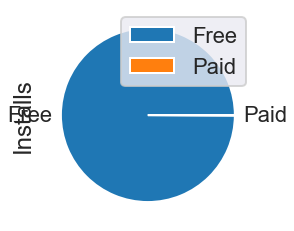

In [155]:
df.groupby('Type').agg({'Installs':sum}).plot.pie(y='Installs')


<AxesSubplot:ylabel='None'>

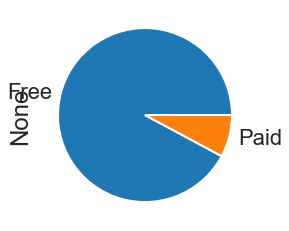

In [156]:

df.value_counts('Type').plot.pie(y='Type')


<AxesSubplot:title={'center':'Percentage of Installs Number for Free App and Paid App'}, ylabel='Installs'>

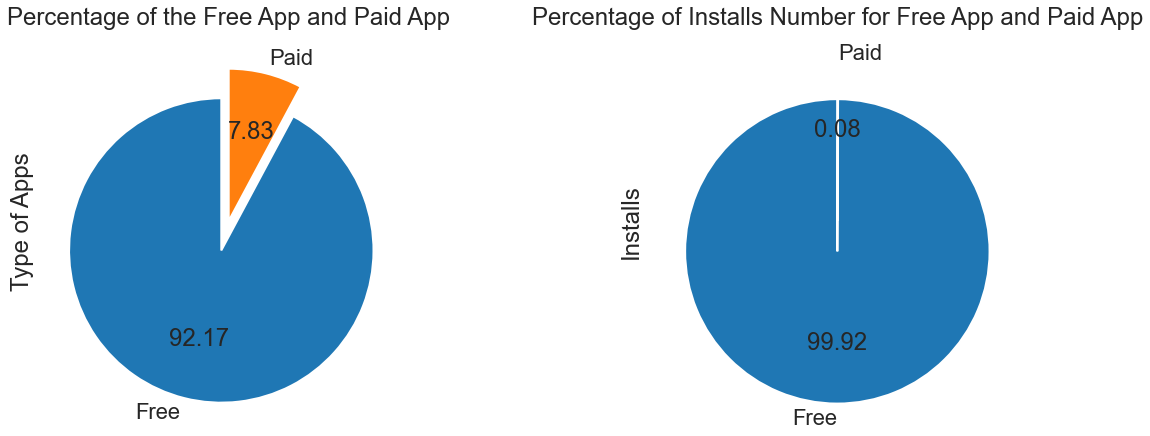

In [157]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
df.value_counts('Type').plot.pie(y='Type',startangle=90, explode=(0.2,0), title='Percentage of the Free App and Paid App', legend=False, autopct='%.2f', ax=ax[0])
ax[0].set(ylabel='Type of Apps')
df.groupby('Type').agg({'Installs':sum}).plot.pie(y='Installs', startangle=90, explode=(0.2,0), title='Percentage of Installs Number for Free App and Paid App', legend=False, autopct='%.2f', ax=ax[1])


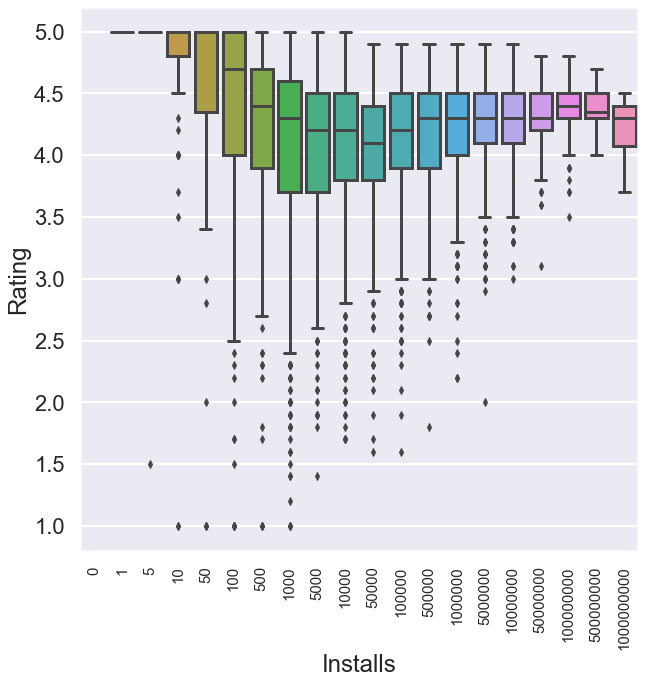

In [158]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Installs",y="Rating",data=df)
plt.xticks(size=15,rotation=90)
plt.show()

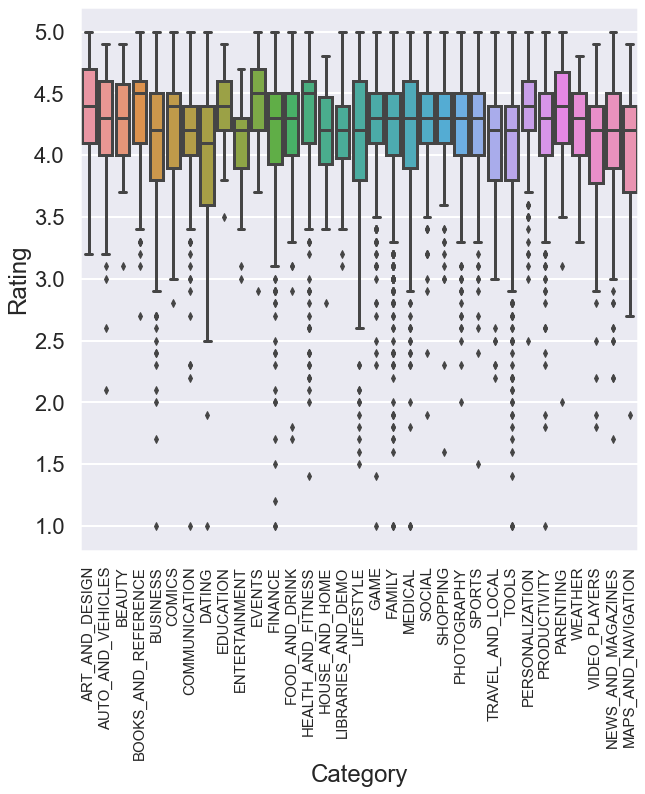

In [159]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Category",y="Rating",data=df)
plt.xticks(size=15,rotation=90)
plt.show()


# Which Category are of largest size ??

In [160]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

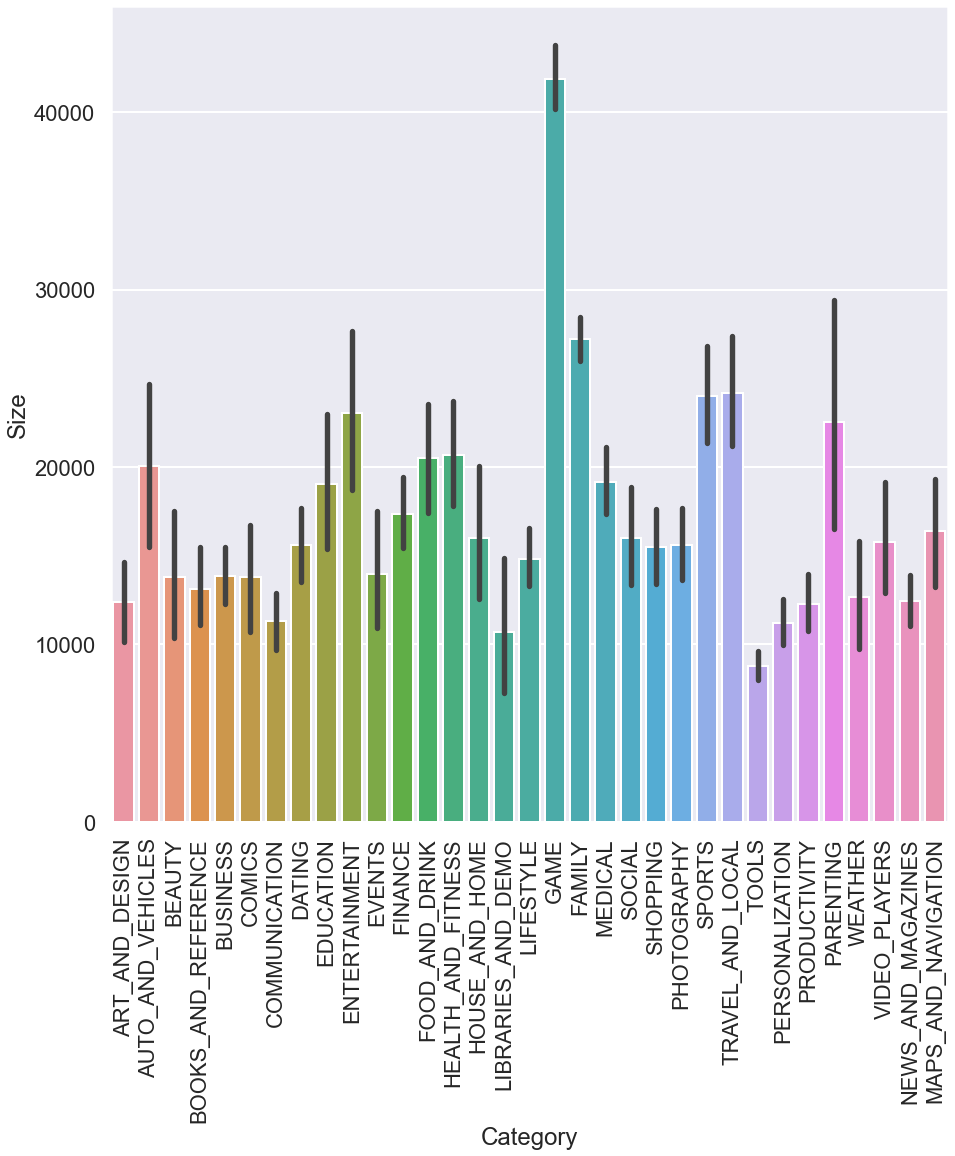

In [161]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
sns.barplot('Category','Size',data=df)
plt.show()


Text(0.5, 1.0, 'Time series plot of Last Updates')

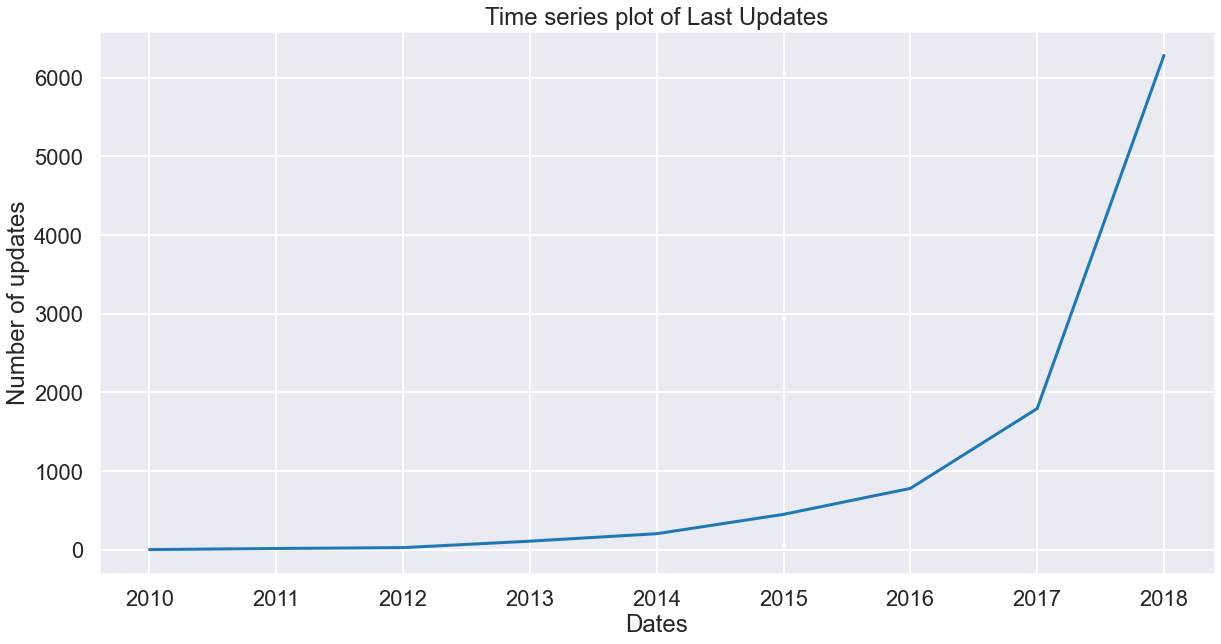

In [163]:
plt.subplots(figsize=(20,10))
freq= pd.Series()
freq=df['Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

In [164]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


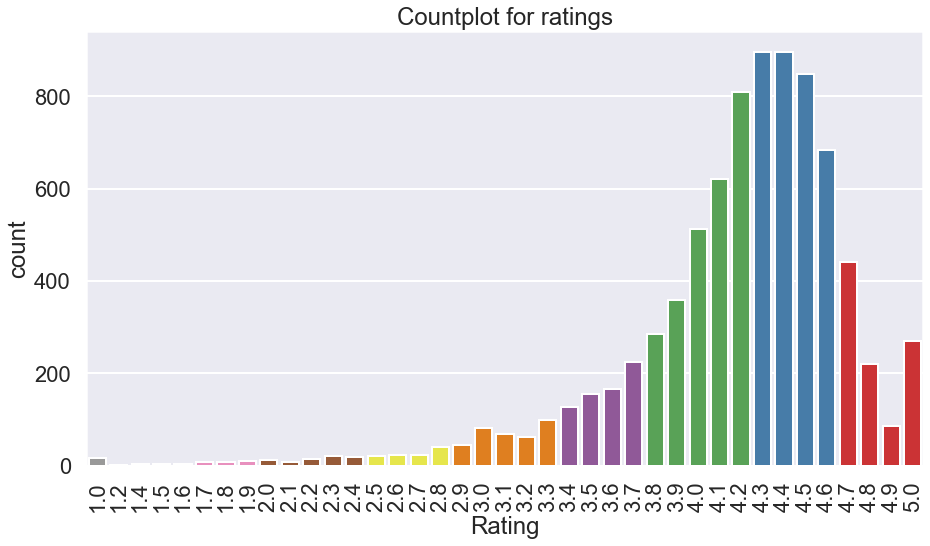

In [165]:

plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = df,palette="Set1_r")
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()